# [20250412] SimCLR Data Argumentation

### Goal
Train a SimCLR model using the unsupervised split of the **STL-10**(100k unlabeled images for unsupervised learning) dataset.

Then use the pretrained model for classification tasks on:
- STL-10 (labeled data)
- CIFAR-10

### Expected Outcomes

The model perform well on STL-10 labeled data

Performance on CIFAR-10 classes will vary:
- High accuracy is expected on classes shared with STL-10
- Lower accuracy is expected on classes not shared with STL-10(**frog, monkey**)



In [2]:
import torch
import torchvision

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [4]:
stl10_dataset = datasets.STL10(
    root='./data', split='unlabeled', transform=transforms.ToTensor(),
    download=True
)
print(f'STL-10 Dataset Size: {len(stl10_dataset)}') # 100k

100%|██████████| 2.64G/2.64G [03:12<00:00, 13.8MB/s]


STL-10 Dataset Size: 100000


In [5]:
BATCH_SIZE = 64

stl10_dataloader = DataLoader(stl10_dataset, batch_size=BATCH_SIZE,
                              shuffle=True, num_workers=2)

In [6]:
vis_images, _ = next(iter(stl10_dataloader)) # No Labels

In [7]:
def visualization(grid_img, transform=None):
  npimg = grid_img.numpy()
  plt.axis('off')
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

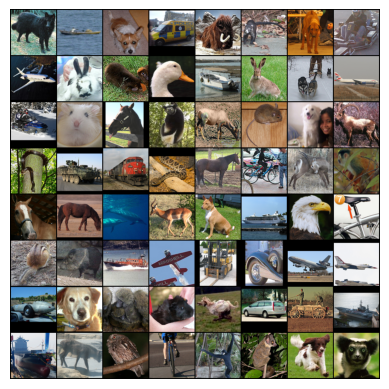

In [8]:
visualization(torchvision.utils.make_grid(vis_images))

In [1]:
# From Original Paper

def get_color_distortion(s=1.0):
  # s is the strength of color distortion.
  color_jitter = transforms.ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
  rnd_color_jitter = transforms.RandomApply([color_jitter], p=0.8)
  rnd_gray = transforms.RandomGrayscale(p=0.2)
  color_distort = transforms.Compose([rnd_color_jitter, rnd_gray])
  return color_distort

In [62]:
# Gaussian Blur: We randomly sample σ∈[0.1,2.0], and the kernel size is set to be 10% of the image height/width.
data_arg = transforms.Compose([
    transforms.RandomCrop(size=(32, 32)),
    get_color_distortion(),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)) # 32 * 0.1 = 3.2
])

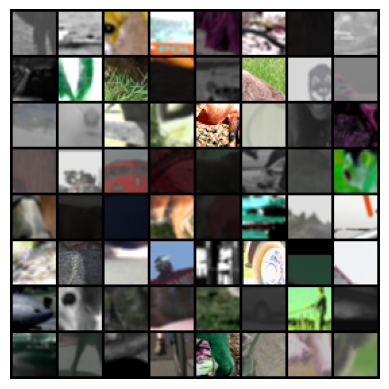

In [63]:
arged_img = torch.stack([data_arg(img) for img in vis_images])

visualization(torchvision.utils.make_grid(arged_img))